In [2]:
import pandas as pd
import numpy as np

In [3]:
## Преобразование данных эконом-класса в DataFrame
dfForEconomy = pd.read_excel('economy.xlsx')
## Присвоение нового поля clas, отвечающего за класс комфорта 
dfForEconomy = dfForEconomy.assign(clas = 0)
dfForEconomy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clas
0,24-03-2022,GO FIRST,G8,7559,15:30,Bangalore,02h 30m,non-stop,18:00,Kolkata,"3,845",0
1,08-03-2022,GO FIRST,G8,395,08:10,Bangalore,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,16:35,Delhi,"4,028",0
2,22-02-2022,Air India,AI,868,18:00,Delhi,16h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:55,Chennai,"11,520",0
3,23-02-2022,Indigo,6E,438,18:50,Hyderabad,01h 15m,non-stop,20:05,Chennai,"4,453",0
4,26-02-2022,Vistara,UK,816,11:30,Bangalore,08h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:05,Mumbai,"7,212",0


In [4]:
# Преобразование данных бизнес-класса в DataFrame
dfForBusiness = pd.read_excel('business.xlsx')
## Присвоение нового поля clas, отвечающего за класс комфорта
dfForBusiness = dfForBusiness.assign(clas = 1)
dfForBusiness.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clas
0,15-03-2022,Air India,AI,615,05:45,Mumbai,12h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:30,Delhi,"41,101",1
1,21-03-2022,Vistara,UK,930,07:30,Mumbai,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:45,Chennai,"64,173",1
2,10-03-2022,Vistara,UK,814,21:10,Bangalore,15h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:35,Mumbai,"84,896",1
3,20-03-2022,Vistara,UK,836,10:45,Chennai,11h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:50,Mumbai,"88,003",1
4,05-03-2022,Vistara,UK,706,10:15,Kolkata,11h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:15,Mumbai,"64,831",1


In [5]:
## Соединяем dataframe эконом и бизнес класса в один 
df = pd.concat([dfForBusiness, dfForEconomy], ignore_index=True)

In [6]:
## Убираем ненужные символы из столбца stop, отвечающего за кол-во остановок
df["stop"] = df["stop"].astype(str).str.replace('\t', '', regex=False)
df["stop"] = df["stop"].astype(str).str.replace('\n', '', regex=False)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clas
0,15-03-2022,Air India,AI,615,05:45,Mumbai,12h 45m,1-stop,18:30,Delhi,"41,101",1
1,21-03-2022,Vistara,UK,930,07:30,Mumbai,15h 15m,1-stop,22:45,Chennai,"64,173",1
2,10-03-2022,Vistara,UK,814,21:10,Bangalore,15h 25m,1-stop,12:35,Mumbai,"84,896",1
3,20-03-2022,Vistara,UK,836,10:45,Chennai,11h 05m,1-stop,21:50,Mumbai,"88,003",1
4,05-03-2022,Vistara,UK,706,10:15,Kolkata,11h 00m,1-stop,21:15,Mumbai,"64,831",1


In [7]:
## изменим строковые значения столбца stop на числовые
df.loc[df["stop"].astype(str).str.contains('non'), "stop"] = "0"
df.loc[df["stop"].astype(str).str.contains('1'), "stop"] = "1"
df.loc[df["stop"].astype(str).str.contains('2'), "stop"] = "2"
df["stop"] = df["stop"].astype(int)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clas
0,15-03-2022,Air India,AI,615,05:45,Mumbai,12h 45m,1,18:30,Delhi,"41,101",1
1,21-03-2022,Vistara,UK,930,07:30,Mumbai,15h 15m,1,22:45,Chennai,"64,173",1
2,10-03-2022,Vistara,UK,814,21:10,Bangalore,15h 25m,1,12:35,Mumbai,"84,896",1
3,20-03-2022,Vistara,UK,836,10:45,Chennai,11h 05m,1,21:50,Mumbai,"88,003",1
4,05-03-2022,Vistara,UK,706,10:15,Kolkata,11h 00m,1,21:15,Mumbai,"64,831",1


In [8]:
## удалим ненужные столбцы, отвечающие за коды билетов и авиакомпаний
del df["ch_code"]
del df["num_code"]
## время прибытия arr_time определяется столбцами время отправления (dep_time) и время полёта (time_taken), поэтому удаляем его 
del df["arr_time"]
df.head()

,date,airline,dep_time,from,time_taken,stop,to,price,clas
0,15-03-2022,Air India,05:45,Mumbai,12h 45m,1,Delhi,"41,101",1
1,21-03-2022,Vistara,07:30,Mumbai,15h 15m,1,Chennai,"64,173",1
2,10-03-2022,Vistara,21:10,Bangalore,15h 25m,1,Mumbai,"84,896",1
3,20-03-2022,Vistara,10:45,Chennai,11h 05m,1,Mumbai,"88,003",1
4,05-03-2022,Vistara,10:15,Kolkata,11h 00m,1,Mumbai,"64,831",1


In [9]:
## преобразуем дату в числовое значение
df["date"] = df["date"].astype(str).str[:-4]
df["date"] = df["date"].astype(str).str.replace('-', '')
df["date"] = df["date"].astype(str).str[2:4] + df["date"].astype(str).str[:2]
df["date"] = df["date"].astype(int)
df.head()


,date,airline,dep_time,from,time_taken,stop,to,price,clas
0,315,Air India,05:45,Mumbai,12h 45m,1,Delhi,"41,101",1
1,321,Vistara,07:30,Mumbai,15h 15m,1,Chennai,"64,173",1
2,310,Vistara,21:10,Bangalore,15h 25m,1,Mumbai,"84,896",1
3,320,Vistara,10:45,Chennai,11h 05m,1,Mumbai,"88,003",1
4,305,Vistara,10:15,Kolkata,11h 00m,1,Mumbai,"64,831",1


In [10]:
## аналогично преобразуем price в числовое значение

df["price"] = df["price"].astype(str).str.replace(',', '')
df["price"] = df["price"].astype(str).str.replace('.', '')
df["price"] = df["price"].astype(float)

In [11]:
## просмотрим, какие города и авиалинии есть в наборе
airline = [i for i in set([i for i in df["airline"]])]
From = [i for i in set([i for i in df["from"]])]
To = [i for i in set([i for i in df["to"]])]

## заменим названия городов и авиалиний на числовые значения (id)
for plane in airline:
    df.loc[df["airline"] == plane, "airline"] = str(airline.index(plane))
for city in From:
    df.loc[df["from"] == city, "from"] = str(From.index(city))
for city in To:
    df.loc[df["to"] == city, "to"] = str(To.index(city))
df["airline"] = df["airline"].astype(int)
df["from"] = df["from"].astype(int)
df["to"] = df["to"].astype(int)

print(airline)
print(From)
print(To)


['GO FIRST', 'StarAir', 'Indigo', 'Vistara', 'AirAsia', 'Trujet', 'Air India', 'SpiceJet']
['Hyderabad', 'Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Bangalore']
['Hyderabad', 'Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Bangalore']


In [12]:
## поле time_taken содержит некоторые некорректные данные, преобразуем их в единый формат
df['time_taken'] = df['time_taken'].apply(lambda x: '01h 00m' if '1.' in x else x)
df['time_taken'] = df['time_taken'].apply(lambda x: '0' + x if len(x) == 6 else x)
## проверим, что длина каждого поля одинаковая
print(set(len(i) for i in set(df["time_taken"])))


{7}


In [13]:
## преобразуем время в числовое значение - количество минут
def time_to_str(time_series):
    return time_series.apply(lambda x: str(int(x[:2]) * 60 + int(x[4:6])))
df["time_taken"] = time_to_str(df["time_taken"])
df["time_taken"] = df["time_taken"].astype(int)

def deptime_to_str(time_series):
    return time_series.apply(lambda x: str(int(x[:2]) * 60 + int(x[3:5])))
df["dep_time"] = time_to_str(df["dep_time"])
df["dep_time"] = df["dep_time"].astype(int)

In [15]:
## выведем текущий вид dataFrame
df.head()

,date,airline,dep_time,from,time_taken,stop,to,price,clas
0,315,6,305,2,765,1,3,41101.0,1
1,321,3,420,2,915,1,4,64173.0,1
2,310,3,1260,5,925,1,2,84896.0,1
3,320,3,605,4,665,1,2,88003.0,1
4,305,3,605,1,660,1,2,64831.0,1


In [16]:
## проверим тип данных каждого столбца
df.dtypes

date            int32
airline         int32
dep_time        int32
from            int32
time_taken      int32
stop            int32
to              int32
price         float64
clas            int64
dtype: object

In [17]:
## рандомно перемешаем данные для дальнейшего обучения
from sklearn.utils import shuffle
df = shuffle(df)
## Нормализуем данные
print(df.mean())
print(df.std())
X = df.drop('price', axis=1)
X = (X - X.mean()) / X.std() # нормализуем данные
y = df['price']

22683.868561457934 20875.7709068807
date            283.919857
airline           3.606204
dep_time        781.114409
from              2.555839
time_taken      732.907093
stop              0.923924
to                2.521411
price         20875.770907
clas              0.311351
dtype: float64
date             45.747274
airline           1.853067
dep_time        321.879003
from              1.633158
time_taken      431.536740
stop              0.397781
to                1.650439
price         22683.868561
clas              0.463047
dtype: float64


In [19]:
## формирование структуры нейронной сети
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import tensorflow as tf
## возьмём для тестирования 20% всех данных
countDataForTest = 48_000
x_train, y_train = X[countDataForTest:], y[countDataForTest:]
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
## создаём нейронную сеть из последовательных слоев из трёх полносвязных слоёв Dense
model = keras.Sequential([ 
    Dense(128, activation='relu', input_shape = (x_train.shape[1],)),
    Dropout(0.01), # 1% нейронов будут случайным образом отключены во время обучения для предотвращения переобучения
    Dense(64, activation='relu'), # В качестве функции активации используется ReLU, которая помогает модели обучаться нелинейным взаимосвязям
    Dropout(0.01),
    Dense(32, activation='relu'),
    Dropout(0.01),
    Dense(1),
])
## в качестве оптимизатора возьмём adam
model.compile(optimizer="adam", loss= "mse",metrics=["mae"])
## при обучении модели обучающая выборка также будет разбита на обучающую и валидационную (80% и 20%) для предотварщения переобучения
history = model.fit(x_train, y_train, epochs=20,batch_size=1, validation_split=0.2)

Epoch 1/20
153766/153766 [==============================] - 122s 792us/step - loss: 38158220.0000 - mae: 3718.8459 - val_loss: 33073708.0000 - val_mae: 3481.7878
Epoch 2/20
153766/153766 [==============================] - 122s 795us/step - loss: 33460912.0000 - mae: 3501.1692 - val_loss: 30884064.0000 - val_mae: 3340.2805
Epoch 3/20
153766/153766 [==============================] - 125s 813us/step - loss: 32363810.0000 - mae: 3425.0032 - val_loss: 29372992.0000 - val_mae: 3250.3940
Epoch 4/20
153766/153766 [==============================] - 126s 819us/step - loss: 30705398.0000 - mae: 3342.7585 - val_loss: 27570888.0000 - val_mae: 3183.5249
Epoch 5/20
153766/153766 [==============================] - 124s 808us/step - loss: 28781300.0000 - mae: 3236.7373 - val_loss: 25647416.0000 - val_mae: 3035.7461
Epoch 6/20
153766/153766 [==============================] - 123s 800us/step - loss: 27045286.0000 - mae: 3126.4031 - val_loss: 24304950.0000 - val_mae: 2937.7212
Epoch 7/20
153766/153766 [==

In [24]:
##  проверка загрузки и сохранения обученной модели
model.save('modelForAvia.h5')
model_loaded = keras.models.load_model('modelForAvia.h5')



In [22]:
## проведём проверку качества обученной модели на тестовых данных
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
model = keras.models.load_model('modelForAvia.h5')
x_test, y_test = X[:countDataForTest], y[:countDataForTest]
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
## предсказываем тестовые данные 
y_pred = model.predict(x_test)
## сравниваем предсказанные данные с тестовыми
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred)
## для наглядного примера выведем десять тестовые и предсказанные данные
print(y_test[:10])
print(y_pred[:10])
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

6007/6007 [==============================] - 4s 613us/step
R^2 Score: 0.9623925151064152
1500/1500 [==============================] - 1s 663us/step - loss: 19845514.0000 - mae: 2541.7844
[19845514.0, 2541.784423828125]
1500/1500 [==============================] - 1s 641us/step
R^2 Score: 0.9612932176761368
[ 4452.  4402. 11163.  4417.  5949.  7982. 20274. 60396. 48851.  5986.]
[[ 4681.529 ]
 [ 4990.3325]
 [11011.463 ]
 [ 4916.8574]
 [ 5902.1147]
 [ 7390.112 ]
 [14932.535 ]
 [54066.504 ]
 [52923.996 ]
 [ 6531.1646]]
Mean Absolute Error (MAE): 2541.7841234982807
Mean Squared Error (MSE): 19845519.788010646
Root Mean Squared Error (RMSE): 4454.831061668966
R^2 Score: 0.9612932176761368
MAPE:  0.18193463522761255


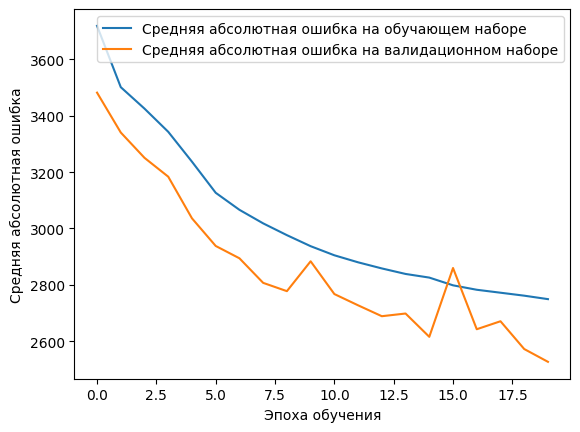

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на валидационном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [26]:
n = len(y_pred)
Y_test = y_test 
Y_pred = y_pred
MAPE = 0
for i in range(n):
    MAPE += abs(Y_pred[i][0] - Y_test[i]) / abs(Y_test[i])
print(f'MAPE = {1 / n * MAPE * 100}%')


MAPE = 18.193463522761242%


In [27]:
df.corr()

,date,airline,dep_time,from,time_taken,stop,to,price,clas
date,1.000000,-0.036393,-0.002773,-0.006408,-0.040015,-0.006664,0.005759,-0.096303,-0.014775
airline,-0.036393,1.000000,0.025580,-0.015083,0.318512,0.062023,-0.014889,0.125163,0.164249
dep_time,-0.002773,0.025580,1.000000,-0.038139,0.142523,-0.061156,-0.013809,0.030670,0.037664
from,-0.006408,-0.015083,-0.038139,1.000000,-0.022057,-0.014640,-0.182904,0.007656,0.007324
time_taken,-0.040015,0.318512,0.142523,-0.022057,1.000000,0.468084,-0.052062,0.204639,0.139225
stop,-0.006664,0.062023,-0.061156,-0.014640,0.468084,1.000000,-0.017329,0.120078,0.001348
to,0.005759,-0.014889,-0.013809,-0.182904,-0.052062,-0.017329,1.000000,0.002814,0.002796
price,-0.096303,0.125163,0.030670,0.007656,0.204639,0.120078,0.002814,1.000000,0.937858
clas,-0.014775,0.164249,0.037664,0.007324,0.139225,0.001348,0.002796,0.937858,1.000000
